In [1]:
from google.colab import files
uploaded=files.upload()

Saving 3ec0182a-506c-41cf-a7b8-c24b4954e106_Series - Metadata.csv to 3ec0182a-506c-41cf-a7b8-c24b4954e106_Series - Metadata.csv


<ipython-input-5-a3ca18a5bfaf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_15['2022 [YR2022]'] = pd.to_numeric(top_15['2022 [YR2022]'], errors='coerce')


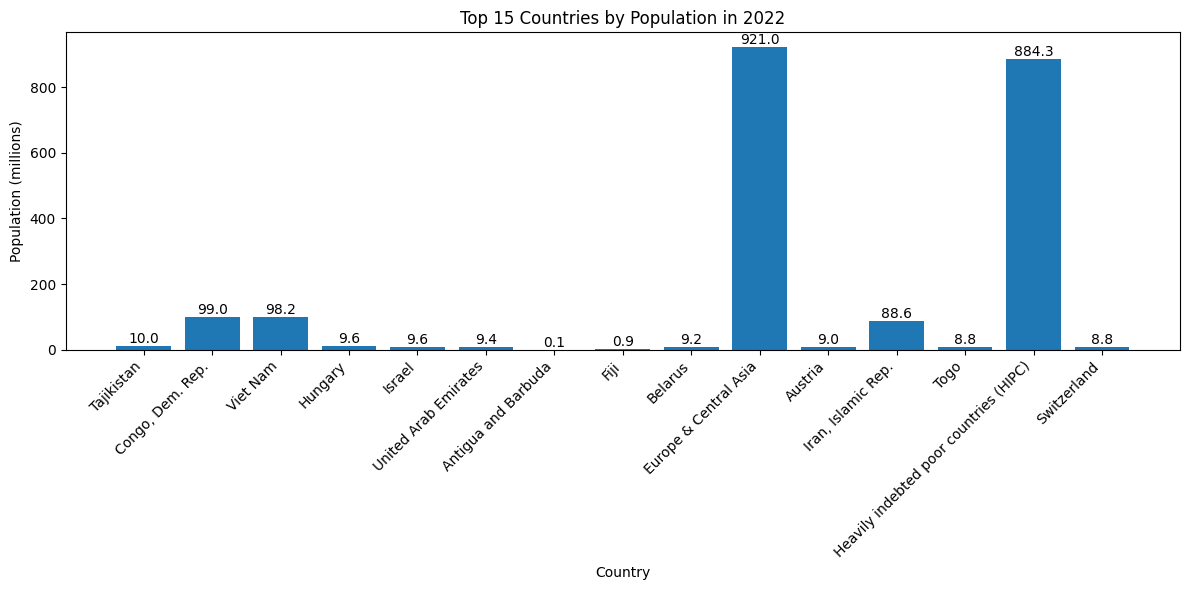

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('3ec0182a-506c-41cf-a7b8-c24b4954e106_Series - Metadata.csv')

# Filter out non-country rows and sort by 2022 population
countries = df[df['Country Code'].notna() & (df['Country Code'].str.len() == 3)]
countries_sorted = countries.sort_values('2022 [YR2022]', ascending=False)

# Select top 15 countries
top_15 = countries_sorted.head(15)

# Convert population values to numeric and handle potential errors
top_15['2022 [YR2022]'] = pd.to_numeric(top_15['2022 [YR2022]'], errors='coerce')

# Create the bar chart
plt.figure(figsize=(12, 6))
# Divide the population values by 1e6 to express them in millions
plt.bar(top_15['Country Name'], top_15['2022 [YR2022]'] / 1e6)

# Customize the chart
plt.title('Top 15 Countries by Population in 2022')
plt.xlabel('Country')
plt.ylabel('Population (millions)')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(top_15['2022 [YR2022]']):
    plt.text(i, v/1e6, f'{v/1e6:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()